In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [25]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV
plt.style.use('seaborn-bright')

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')

In [3]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0
1,0002_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0
2,0003_01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0
3,0003_02,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0
4,0004_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0
5,0005_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,44.0,0.0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1.0
6,0006_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1.0
7,0007_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,35.0,0.0,0.0,785.0,17.0,216.0,0.0,Andona Beston,1.0
8,0008_01,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1.0
9,0008_03,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,45.0,0.0,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,1.0


,Cabin_D,Transported
VIP,,
0.0,447,447
1.0,31,31


Cabin_D의 VIP인 승객 비율 : Cabin_D        0.064854
Transported    0.064854
dtype: float64


Text(0.5, 0, 'VIP')

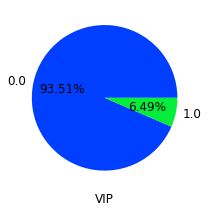

In [35]:
df_D = df[df['Cabin_D'] == 1].iloc[:,[6,15,22]].groupby('VIP').count()
df_D
print('Cabin_D의 VIP인 승객 비율 :', df_D.iloc[1]/(df_D.iloc[0] + df_D.iloc[1]))


df_onlyD = df[df['Cabin_D'] == 1]
#Visualizing Percentages of people in 'VIP'
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=(15,9))
columns=['VIP']
for i, col in enumerate(columns):
    q, r = divmod(i,4)
    ax = fig.add_subplot(int(str(q+1)+"4"+str(r+1)))
    indeces = df_onlyD[col].value_counts().index
    patches, texts, autotexts = ax.pie(df_onlyD[col].value_counts(), labels=indeces, autopct='%.2f%%')
    for auto in autotexts:
        auto.set_fontsize(12)
    plt.xlabel(col)
plt.show()

,Cabin_E,Transported
VIP,,
0.0,861,861
1.0,15,15


Cabin_E의 VIP인 승객 비율 : Cabin_E        0.017123
Transported    0.017123
dtype: float64


Text(0.5, 0, 'VIP')

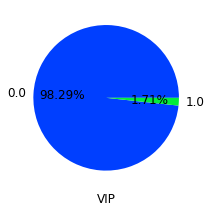

In [36]:
df_E = df[df['Cabin_E'] == 1].iloc[:,[7,15,22]].groupby('VIP').count()
df_E
print('Cabin_E의 VIP인 승객 비율 :', df_E.iloc[1]/(df_E.iloc[0] + df_E.iloc[1]))

df_onlyE = df[df['Cabin_E'] == 1]
#Visualizing Percentages of people in 'VIP'
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=(15,9))
columns=['VIP']
for i, col in enumerate(columns):
    q, r = divmod(i,4)
    ax = fig.add_subplot(int(str(q+1)+"4"+str(r+1)))
    indeces = df_onlyE[col].value_counts().index
    patches, texts, autotexts = ax.pie(df_onlyE[col].value_counts(), labels=indeces, autopct='%.2f%%')
    for auto in autotexts:
        auto.set_fontsize(12)
    plt.xlabel(col)
plt.show()

,Cabin_F,Transported
VIP,,
0.0,2765,2765
1.0,29,29


Cabin_F의 VIP인 승객 비율 : Cabin_F        0.010379
Transported    0.010379
dtype: float64


Text(0.5, 0, 'VIP')

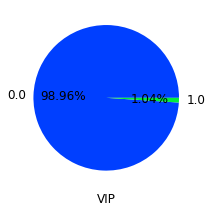

In [37]:
df_F = df[df['Cabin_F'] == 1].iloc[:,[8,15,22]].groupby('VIP').count()
df_F
print('Cabin_F의 VIP인 승객 비율 :', df_F.iloc[1]/(df_F.iloc[0] + df_F.iloc[1]))


df_onlyF = df[df['Cabin_F'] == 1]
#Visualizing Percentages of people in 'VIP'
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=(15,9))
columns=['VIP']
for i, col in enumerate(columns):
    q, r = divmod(i,4)
    ax = fig.add_subplot(int(str(q+1)+"4"+str(r+1)))
    indeces = df_onlyF[col].value_counts().index
    patches, texts, autotexts = ax.pie(df_onlyF[col].value_counts(), labels=indeces, autopct='%.2f%%')
    for auto in autotexts:
        auto.set_fontsize(12)
    plt.xlabel(col)
plt.show()

,Cabin_G,Transported
VIP,,
0.0,2559,2559


Cabin_G의 VIP인 승객 비율 : 0 


Text(0.5, 0, 'VIP')

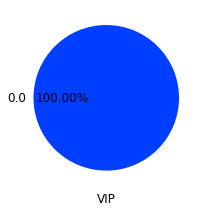

In [38]:
df_G = df[df['Cabin_G'] == 1].iloc[:,[9,15,22]].groupby('VIP').count()
df_G
print('Cabin_G의 VIP인 승객 비율 : 0 ')


df_onlyG = df[df['Cabin_G'] == 1]
#Visualizing Percentages of people in 'VIP'
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=(15,9))
columns=['VIP']
for i, col in enumerate(columns):
    q, r = divmod(i,4)
    ax = fig.add_subplot(int(str(q+1)+"4"+str(r+1)))
    indeces = df_onlyG[col].value_counts().index
    patches, texts, autotexts = ax.pie(df_onlyG[col].value_counts(), labels=indeces, autopct='%.2f%%')
    for auto in autotexts:
        auto.set_fontsize(12)
    plt.xlabel(col)
plt.show()

,Cabin_T,Transported
VIP,,
0.0,5,5


Cabin_T의 VIP인 승객 비율 : 0


Text(0.5, 0, 'VIP')

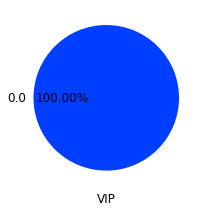

In [40]:
df_T = df[df['Cabin_T'] == 1].iloc[:,[10,15,22]].groupby('VIP').count()
df_T
print('Cabin_T의 VIP인 승객 비율 : 0')


df_onlyT = df[df['Cabin_T'] == 1]
#Visualizing Percentages of people in 'VIP'
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=(15,9))
columns=['VIP']
for i, col in enumerate(columns):
    q, r = divmod(i,4)
    ax = fig.add_subplot(int(str(q+1)+"4"+str(r+1)))
    indeces = df_onlyT[col].value_counts().index
    patches, texts, autotexts = ax.pie(df_onlyT[col].value_counts(), labels=indeces, autopct='%.2f%%')
    for auto in autotexts:
        auto.set_fontsize(12)
    plt.xlabel(col)
plt.show()

,Cabin_T,Transported
VIP,,
0.0,5,5


Cabin_T의 VIP인 승객 비율 : 0


Text(0.5, 0, 'Transported')

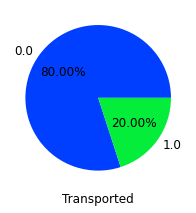

In [41]:
df_T = df[df['Cabin_T'] == 1].iloc[:,[10,15,22]].groupby('VIP').count()
df_T
print('Cabin_T의 VIP인 승객 비율 : 0')


df_onlyT = df[df['Cabin_T'] == 1]
#Visualizing Percentages of people in 'VIP'
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=(15,9))
columns=['Transported']
for i, col in enumerate(columns):
    q, r = divmod(i,4)
    ax = fig.add_subplot(int(str(q+1)+"4"+str(r+1)))
    indeces = df_onlyT[col].value_counts().index
    patches, texts, autotexts = ax.pie(df_onlyT[col].value_counts(), labels=indeces, autopct='%.2f%%')
    for auto in autotexts:
        auto.set_fontsize(12)
    plt.xlabel(col)
plt.show()